# Model evaluation and variable importance

In [ ]:
experiment_name = 'exp_%s_%s' %('random', interest)
raster_name = 'model-pred_%s_%s_%s.tif' %(specie, 'random', interest)
# exp_path = os.path.join(output_path, experiment_name)
# pred_random = rioxr.open_rasterio(os.path.join(exp_path, raster_name), masked=True)

## 1. 

## 5. Variable correlation matrix

(!) move this maybe to script 5 variable importance?

In [148]:
bioclim = xr.Dataset()
for i in range(len(rasters)):
    bioclim[labels[i]] = rioxarray.open_rasterio(os.path.join(input_path, rasters[i]), masked=True)

In [149]:
ds = xr.merge([bioclim, srtm_region])

In [150]:
df = ds.isel(band=0).reset_coords(['band', 'spatial_ref'], drop=True).to_dataframe()
correlation_matrix = df.corr(method='spearman')

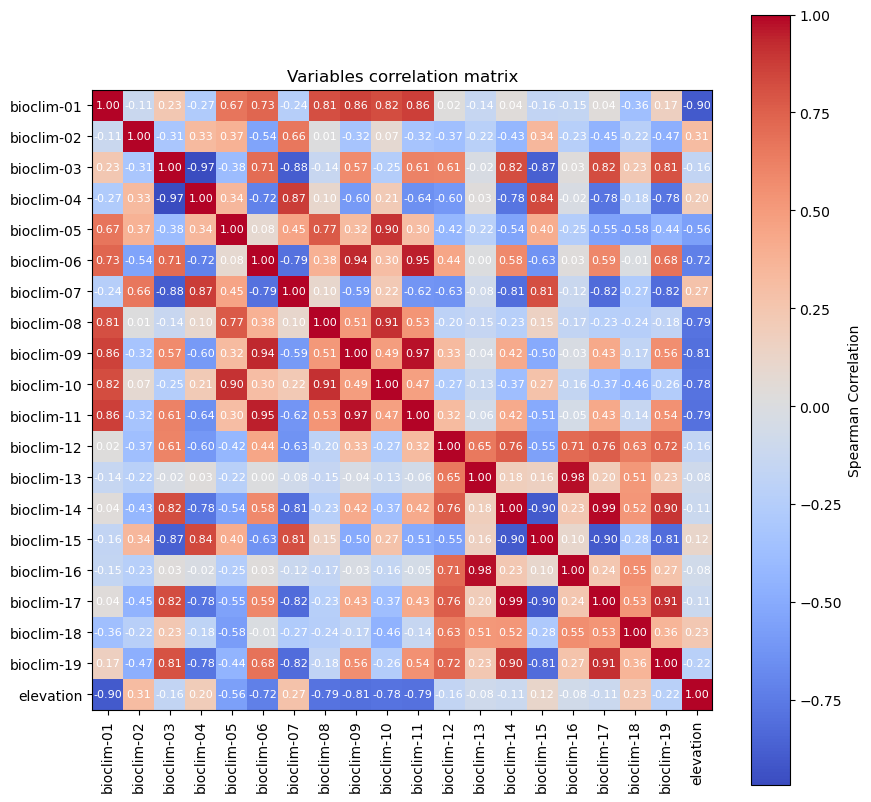

In [151]:
plt.figure(figsize=(10,10))

plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Display Numerical Values on Heatmap
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center', color='white', fontsize=8)

columns = df.columns.tolist()
plt.xticks(range(len(columns)), columns, rotation=90)
plt.yticks(range(len(columns)), columns)
plt.title("Variables correlation matrix")
plt.colorbar(label="Spearman Correlation")
plt.savefig('correlation_heatmap_plot.png')
plt.show()

## 2. 

In [ ]:
# https://github.com/osgeokr/pySDM-geemap/blob/main/pySDM-geemap_Case%20Study%201_Pitta%20nympha.ipynb
# https://github.com/dennisbakhuis/Tutorials/blob/master/3_Covariance_PCA/Principle%20component%20analysis%20and%20the%20covariance%20matrix.ipynb
# https://www.geeksforgeeks.org/exploring-correlation-in-python/